<h1><center> 10-315 Introduction to Machine Learning (SCS Majors) <br> Lecture 6: Naive Bayes </center></h1> 


<h2><center> Leila Wehbe <br> Carnegie Mellon University  <br> Machine Learning Department </center></h2> 


<br>

<br>

<br>

<br>


Reading: <a href ="http://www.cs.cmu.edu/~tom/mlbook/NBayesLogReg.pdf"> Generative and Disciminative Classifiers </a> by Tom Mitchell.

#### Lecture outcomes:
- Conditional Independence
- Naïve Bayes, Gaussian Naive Bayes
- Practical Examples


### The Naïve Bayes Algorithm

Naïve Bayes assumes conditional independence of the $X_i$'s: $P(X_1,...,X_d|Y) =\prod_i P(X_i|,Y)$ 

<font color=darkred>  (more on this assumption soon!) </font>

Using Bayes rule with that assumption:

$$ P(Y=y_k|X_1,...,X_d) = \frac{P(Y=y_k) \prod_i P(X_i|Y=y_k) }{P(X)} $$

- Train the algorithm (estimate $P(X_i|Y=y_k)$ and $P(Y=y_k)$)

- To classify, pick the most probable $Y^{\text{new}}$ for a new sample $X^{\text{new}} = (X_1^{\text{new}},X_2^{\text{new}},...,X_d^{\text{new}})$ as:


$$ Y^{\text{new}} \leftarrow \underset{y_k}{\operatorname{argmax}} P(Y=y_k) \prod_i P(X_i^{\text{new}}|Y=y_k) $$





### Naïve Bayes - Training and Prediction Phase - Discrete $X_i$


Training:
- Estimate $\pi_k \equiv P(Y=y_k)$, get  $\hat\pi_k$
- Estimate $\theta_{ijk} \equiv P(X_i=x_{ij}|Y=y_k) $, get $\hat\theta_{ijk}$
    - $\theta_{ijk}$ is estimate for each label $y_k$:
        - For each variable $X_i$:
            - For each value $x_{ij}$ that $X_i$ can take.


- Prediction: Classify $Y^{\text{new}}$
\begin{eqnarray}Y^{\text{new}} &=& \underset{y_k}{\operatorname{argmax}} P(Y=y_k) \prod_i P(X^{\text{new}}_i=x^{\text{new}}_j|Y=y_k) \\
&=& \underset{y_k}{\operatorname{argmax}} \pi_k\prod_i  \theta_{i,X^\text{new}_i,k}
\end{eqnarray}

<!-- 
\begin{eqnarray}Y^{\text{new}} &=& \underset{y_k}{\operatorname{argmax}} P(Y=y_k) \prod_i P(X^{\text{new}}_i=x^{\text{new}}_j|Y=y_k) \\
&=& \underset{y_k}{\operatorname{argmax}} \pi_k\prod_i  \prod_j \theta_{ijk}^{I(X^{new}_i=x_{ij})}
\end{eqnarray} -->

But... how do we estimate these parameters?

### Naïve Bayes - Training Phase - Discrete $X_i$ - Maximum (Conditional) Likelihood Estimation

$P(X|Y=y_k)$ has parameters $\theta_{ijk}$, one for each value $x_{ij}$ of each $X_i$. 

$P(Y)$ has parameters $\pi$.

To follow the MLE principle, we pick the parameters $\pi$ and $\theta$ that maximizes the (**conditional**) likelihood of the data given the parameters.  
  

To estimate:
- Compute <font color=blue>  $$\hat\pi_k = \hat P(Y=y_k) = \frac{\# D(Y=y_k)}{|D|}$$</font>
- For each label $y_k$:
    - For each variable $X_i$:
        - For each value $x_{ij}$ that $X_i$ can take, compute:
 <font color=blue>   $$\hat\theta_{ijk}= \hat P(X_i=x_{ij}|Y=y_k) = \frac{\# D(X_i=x_{ij} \wedge Y=y_k)}{\# D(Y=y_k)}$$ </font>.



## Naïve Bayes - Training Phase - Discrete $X_i$ 

#### Method 1: Maximum (Conditional) Likelihood Estimation

$P(X|Y=y_k)$ has parameters $\theta_{ijk}$, one for each value $x_{ij}$ of each $X_i$.

To follow the MLE principle, we pick the parameters $\theta$ that maximizes the **conditional** likelihood of the data given the parameters.  
  

#### <font color=black> Method 2:</font> Maximum A Posteriori Probability Estimation

To follow the MAP principle, pick the parameters $\theta$ with maximum posterior probability given the conditional likelihood of the data and the prior on $\theta$.

## Naïve Bayes - Training Phase - Discrete $X_i$ 

#### Method 1: Maximum (Conditional) Likelihood Estimation

To estimate:
- Compute <font color=blue>  $$\hat\pi_k = \hat P(Y=y_k) = \frac{\# D(Y=y_k)}{|D|}$$</font>
- For each label $y_k$:
    - For each variable $X_i$:
        - For each value $x_{ij}$ that $X_i$ can take, compute:
 <font color=blue>   $$\hat\theta_{ijk}= \hat P(X_i=x_{ij}|Y=y_k) = \frac{\# D(X_i=x_{ij} \wedge Y=y_k)}{\# D(Y=y_k)}.$$ </font>
 

 
#### Method 2: Maximum A Posteriori Probability Estimation (Beta or Dirichlet priors)

- $K$: the number of values $Y$ can take
- $J$: the number of values $X$ can take (we assume here that all $X_j$ have the same number of possible values, but this can be changed)


- Example prior for $\pi_k$ where  $K$ > 2: 
    - $\text{Dirichlet}(\beta_\pi,\beta_\pi,..,\beta_\pi)$ prior. (optionally, you can choose different values for each parameter to encode a different weighting).
    - if $K=2$ this becomes a Beta prior.
    
    <br>
    
- Example prior for $\theta_{ijk}$ where J>2 : 
    - $\text{Dirichlet}(\beta_\theta,\beta_\theta,..,\beta_\theta)$ prior. (optionally, you can choose different values for each parameter to encode a different weighting, you can choose a different prior per $X_i$ or even per label $y_k$).
    - if $J=2$ this becomes a Beta prior.

 

 
#### Method 2: Maximum A Posteriori Probability Estimation (Beta or Dirichlet priors)

- $K$: the number of values $Y$ can take
- $J$: the number of values $X$ can take 

    
These priors will act as imaginary examples that smooth the estimated distributions and prevent zero values. 
    
 
 To estimate:
- Compute <font color=blue>  $$\hat\pi_k = \hat P(Y=y_k) = \frac{\# D(Y=y_k) +(\beta_\pi -1)}{|D| + K(\beta_\pi -1)}$$</font>
- For each label $y_k$:
    - For each variable $X_i$:
        - For each value $x_{ij}$ that $X_i$ can take, compute:
 <font color=blue>   $$\hat\theta_{ijk}= \hat P(X_i=x_{ij}|Y=y_k) = \frac{\# D(X_i=x_{ij} \wedge Y=y_k) + (\beta_\theta -1)}{\# D(Y=y_k) + J(\beta_\theta -1)}$$ </font>.
 

## Example: Text classification 

- Classify which emails are spam?

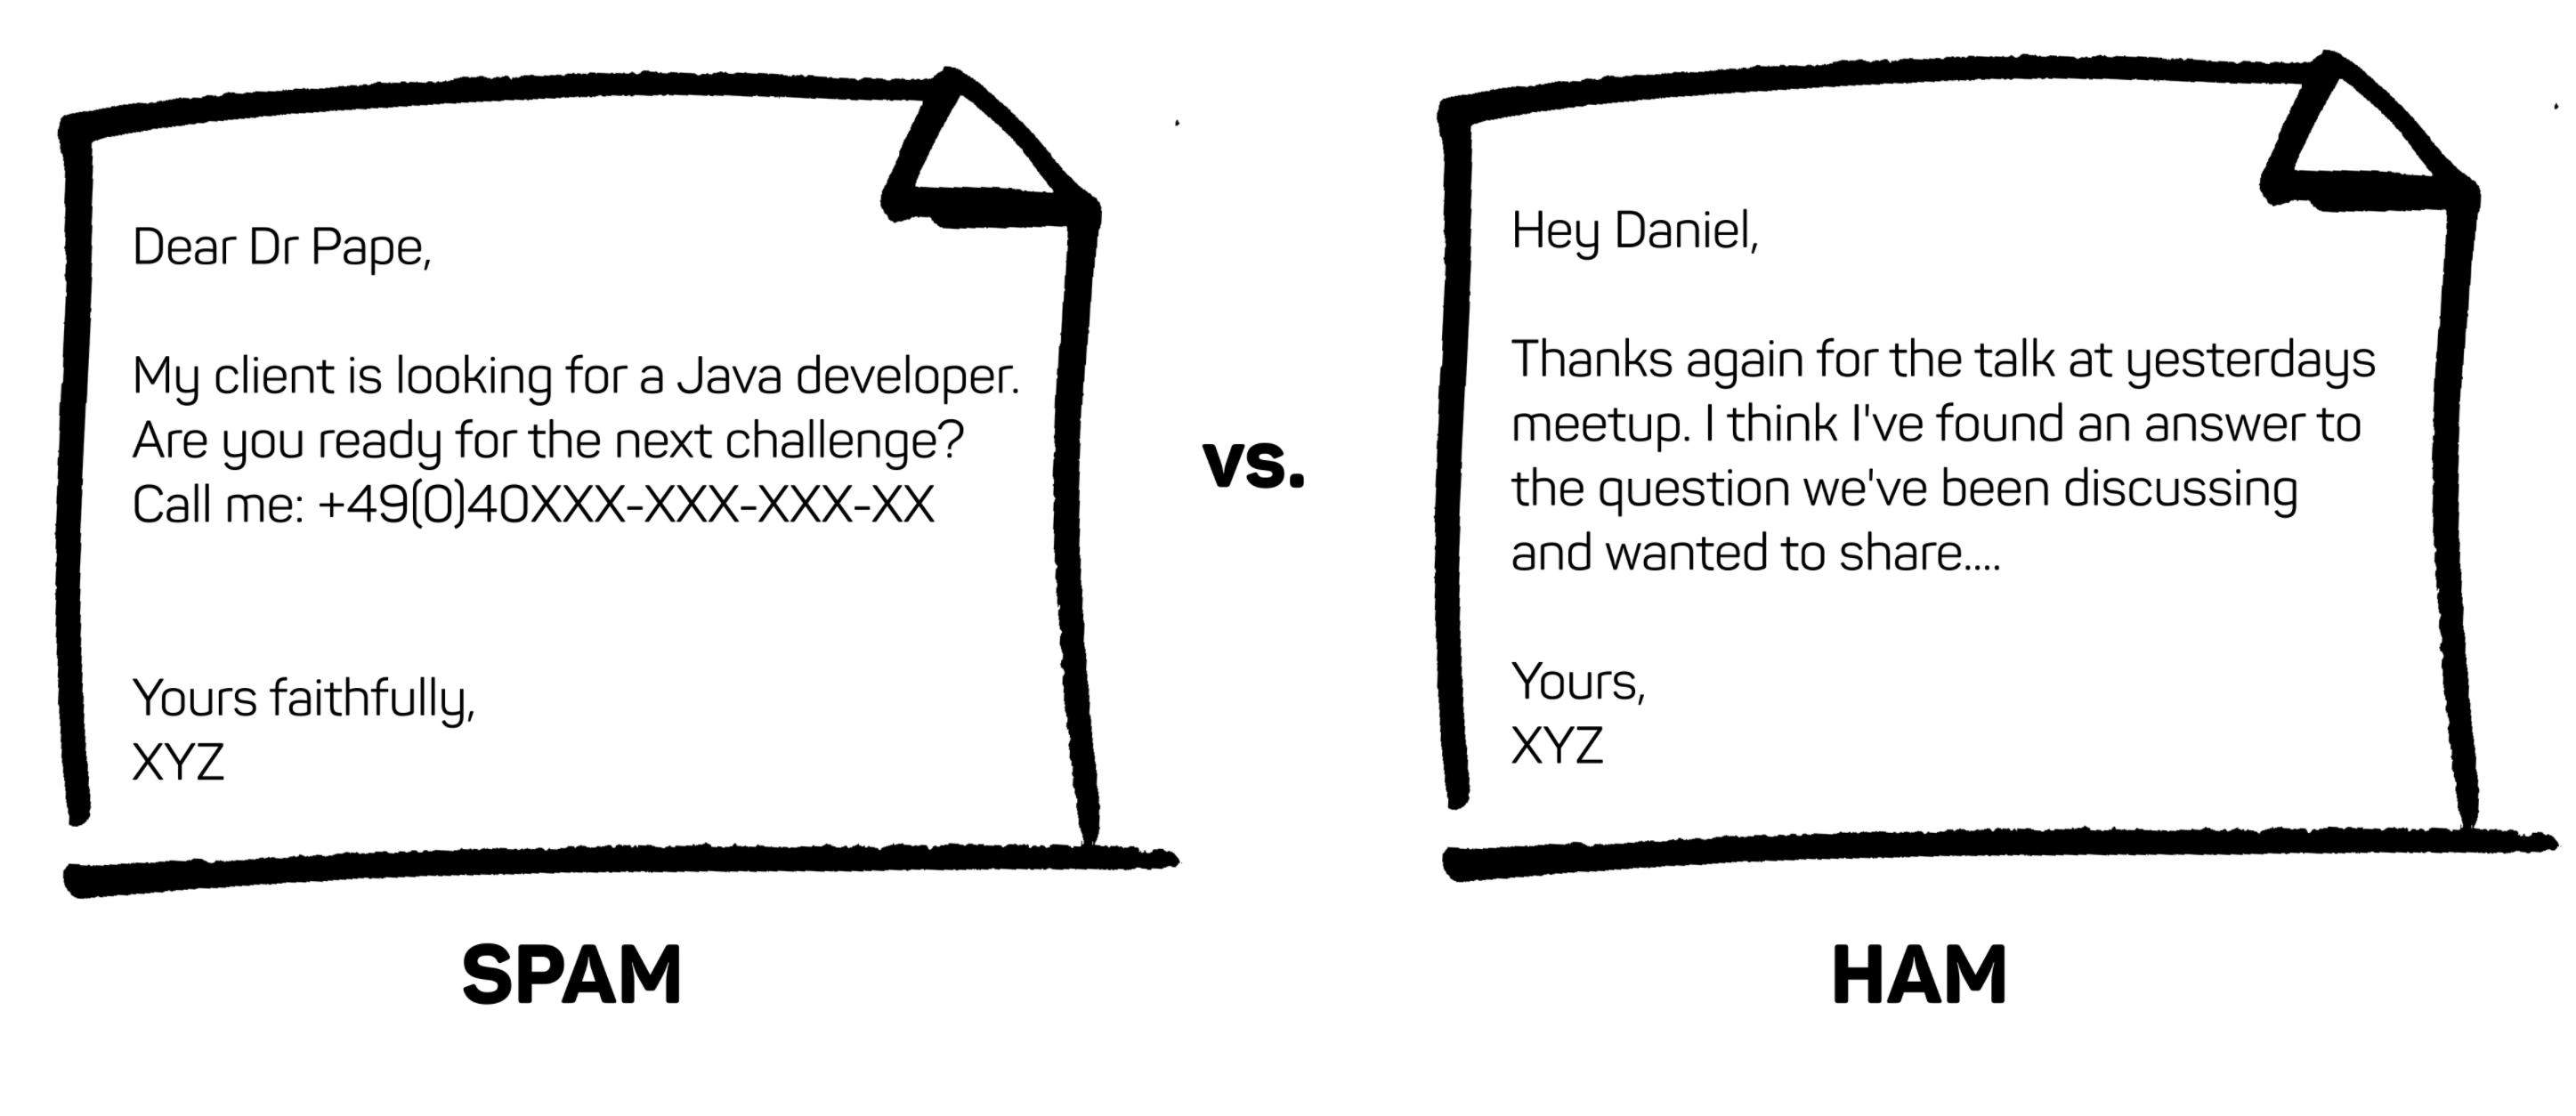
[image by Daniel Pape](https://blog.codecentric.de/en/2016/06/spam-classification-using-sparks-dataframes-ml-zeppelin-part-1/)

- Classify which emails promise an attachment?
- Classify which web pages are student home pages?


How shall we represent text documents for Naïve Bayes?

## How can we express X?

- Y discrete valued.  e.g., Spam or not
- X = ?

## How can we express X?

- Y discrete valued.  e.g., Spam or not
- $X = (X_1, X_2, … X_d)$ with d the number of words in English.
- <font color=darkred>(This is what we do in homework 2)</font>

What are the limitations with this representation?

## How can we express X?

- Y discrete valued.  e.g., Spam or not
- $X = (X_1, X_2, … X_d)$ with d the number of words in English.
- (This is what we do in homework 2)

What are the limitations with this representation?
- Some words always present
- Some words very infrequent
- Doesn’t count how often a word appears
- Conditional independence assumption is false…

##  Alternative Featurization

- $Y$ discrete valued.  e.g., Spam or not
- $X = (X_1, X_2, … X_d)$ = document

- $X_i$ is a random variable describing the word at position i in the document
- possible values for $X_i$ : any word $w_k$ in English
- $X_i$ represents the ith word position in document
- $X_1$ = “I”,  $X_2$ = “am”, $X_3$ = “pleased”

How many parameters do we need to estimate $P(X|Y)$? (say 1000 words per document, 10000 words in english)



##  Alternative Featurization

- $Y$ discrete valued.  e.g., Spam or not
- $X = (X_1, X_2, … X_d)$ = document

- $X_i$ is a random variable describing the word at position i in the document
- possible values for $X_i$ : any word $w_k$ in English
- $X_i$ represents the ith word position in document
- $X_1$ = “I”,  $X_2$ = “am”, $X_3$ = “pleased”

How many parameters do we need to estimate $P(X|Y)$? (say 1000 words per document, 10000 words in english)

**Conditional Independence Assumption** very useful:
- reduce problem to only computing $P(X_i|Y)$ for every $X_i$.



##  “Bag of Words” model

Additional assumption: position doesn't matter! 

(this is not true of language, but can be a useful assumption for building a classifier)

- assume the Xi are IID:
$$ P(X_i|Y) = P(X_j|Y)  (\forall i,j)$$

- we call this "Bag of Words"

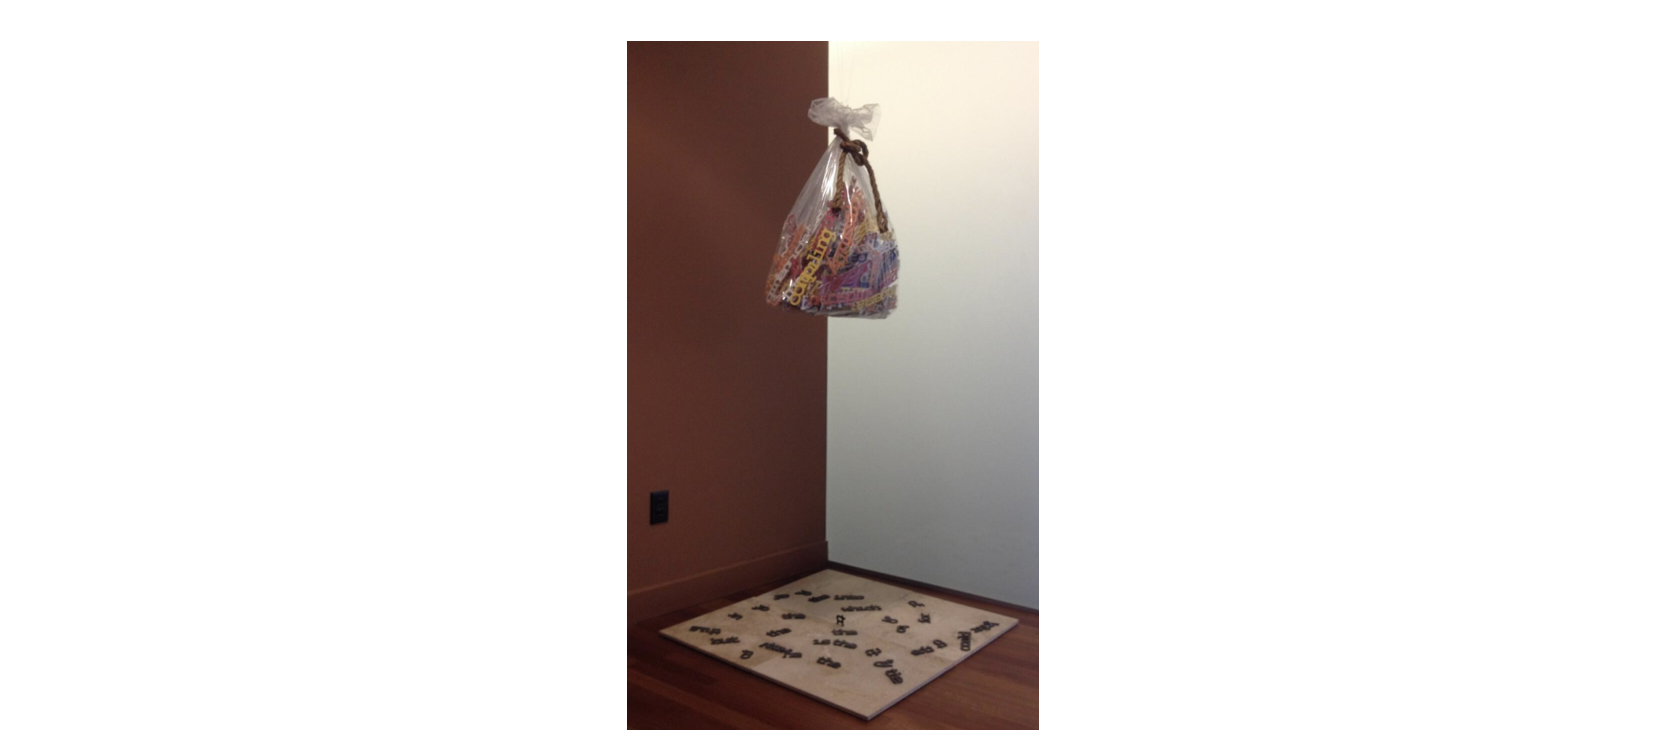
Art installation in Gates building (now removed)


##  “Bag of Words” model

Additional assumption: position doesn't matter! 

(this is not true of language, but can be a useful assumption for building a classifier)
- assume the Xi are IID:
$$ P(X_i|Y) = P(X_j|Y)  (\forall i,j)$$

- we call this "Bag of Words"

**Since all $X_i$s have the same distribution, we only have to estimate one parameter per word, per class.**
    
**$P(X|Y=y_k)$ is a  multinomial  distribution:**

$$ P(X|Y=y_k) \propto \theta_{1k}^{\alpha_{1k}} \theta_{2k}^{\alpha_{2k}}... \theta_{dk}^{\alpha_{dk}}$$

## Review of distributions

\begin{eqnarray}P(X_i = w_j) \begin{cases}
      \theta_1, & \text{if}\ X_i=w_1 \\
      \theta_2, & \text{if}\ X_i=w_2 \\
... & \\
\theta_k, & \text{if}\ X_i=w_K \\
    \end{cases} \end{eqnarray}
    
Probability of observing a document with $\alpha_1$ count of $w_1$, $\alpha_{2}$ count of $w_2$ ... is a multinomial:

$$\frac{|D|!}{\alpha_1!\cdots \alpha_J!} \theta_1^{\alpha_1} \theta_2^{\alpha_2} \theta_3^{\alpha_3} \cdots \theta_J^{\alpha_J}$$

## Review of distributions

Dirichlet Prior examples:

- if constant across classes and words:

$$P(\theta) = \frac{\theta^{\beta_\theta}\theta^{\beta_\theta},...\theta^{\beta_\theta}}{\text{Beta}(\beta_\theta,\beta_\theta,...,\beta_\theta)}$$

- if constant across classes but different for different words:

$$P(\theta) = \frac{\theta^{\beta_1}\theta^{\beta_2},...\theta^{\beta_J}}{\text{Beta}(\beta_1,\beta_2,...,\beta_J)}$$

- if different for different classes $k$ and words: 

$$P(\theta_k) = \frac{\theta^{\beta_{1k}}\theta^{\beta_{2k}},...\theta^{\beta_{Jk}}}{\text{Beta}(\beta_{1k},\beta_{2k},...,\beta_{Jk})}$$



## MAP estimates for Bag of words:

(Dirichlet is the conjugate prior for a multinomial likelihood function)

\begin{eqnarray}
\theta_{jk} = \frac{\alpha_{jk} + \beta_{jk}-1}{\sum_m (\alpha_{mk} + \beta_{mk}-1)} 
\end{eqnarray}

Again the prior acts like halucinated examples

What $\beta$s should we choose?

## Example: Twenty NewsGroups

For code and data, see www.cs.cmu.edu/~tom/mlbook.html  click on “Software and Data”.

Can group labels into groups that share priors:

- comp.graphics, comp.os.ms-windows.misc, comp.sys.ibm.pc.hardware, comp.sys.max.hardware, comp.windows.x

- misc.forsale

- rec.autos, rec.motorcycles, rec.sport.baseball, rec.sport.hockey

- alt.atheism, 

- soc.religion.christian, 

- talk.religion.misc, talk.politics.mideast, talk.politics.misc, talk.politics.guns,

- sci.space, sci.crypt, sci.electronics, sci.med

• Naïve Bayes: 89% classification accuracy


## Learning curve for 20 Newsgroups

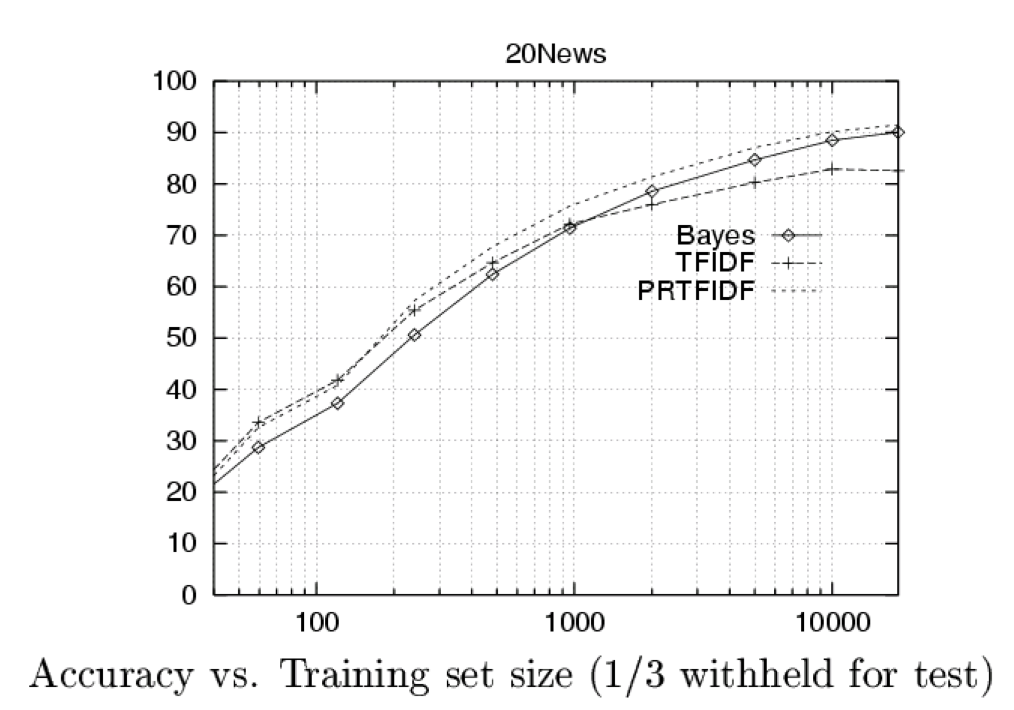

## Even if incorrect assumption, performance can be very good

Even when taking half of the email
- Assumption doesn’t hurt the particular problem?
- Redundancy?
- Leads less examples to train? Converges faster to asymptotic performance? (Ng and Jordan)



## Even if incorrect assumption, performance can be very good

Even when taking half of the email
- Assumption doesn’t hurt the particular problem?
- Redundancy?
- Leads less examples to train? Converges faster to asymptotic performance? (Ng and Jordan)

More recently, algorithms such as LSTMs and Transformers have become very good 
- are able to capture the sequential aspect of language and produce more complex representations. 
- They do have many parameters, but nowhere as much as we mentioned before ($10000^{1000}$).


## Continuous $X_i$s

What can we do? 

E.g. image classification, where $X_i$ is real valued

Classify a person’s cognitive state, based on brain image

- reading a sentence or viewing a picture?
- reading the word describing a “Tool” or “Building”?  
- answering the question, or getting confused?

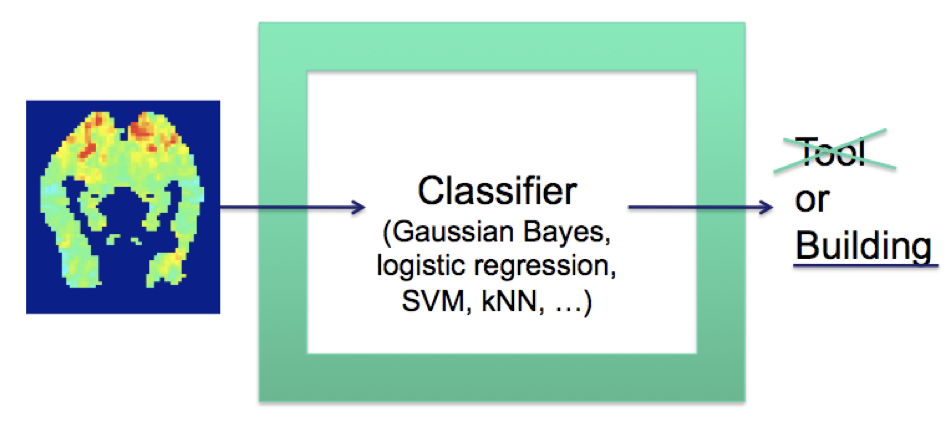

## Stimulus for the study

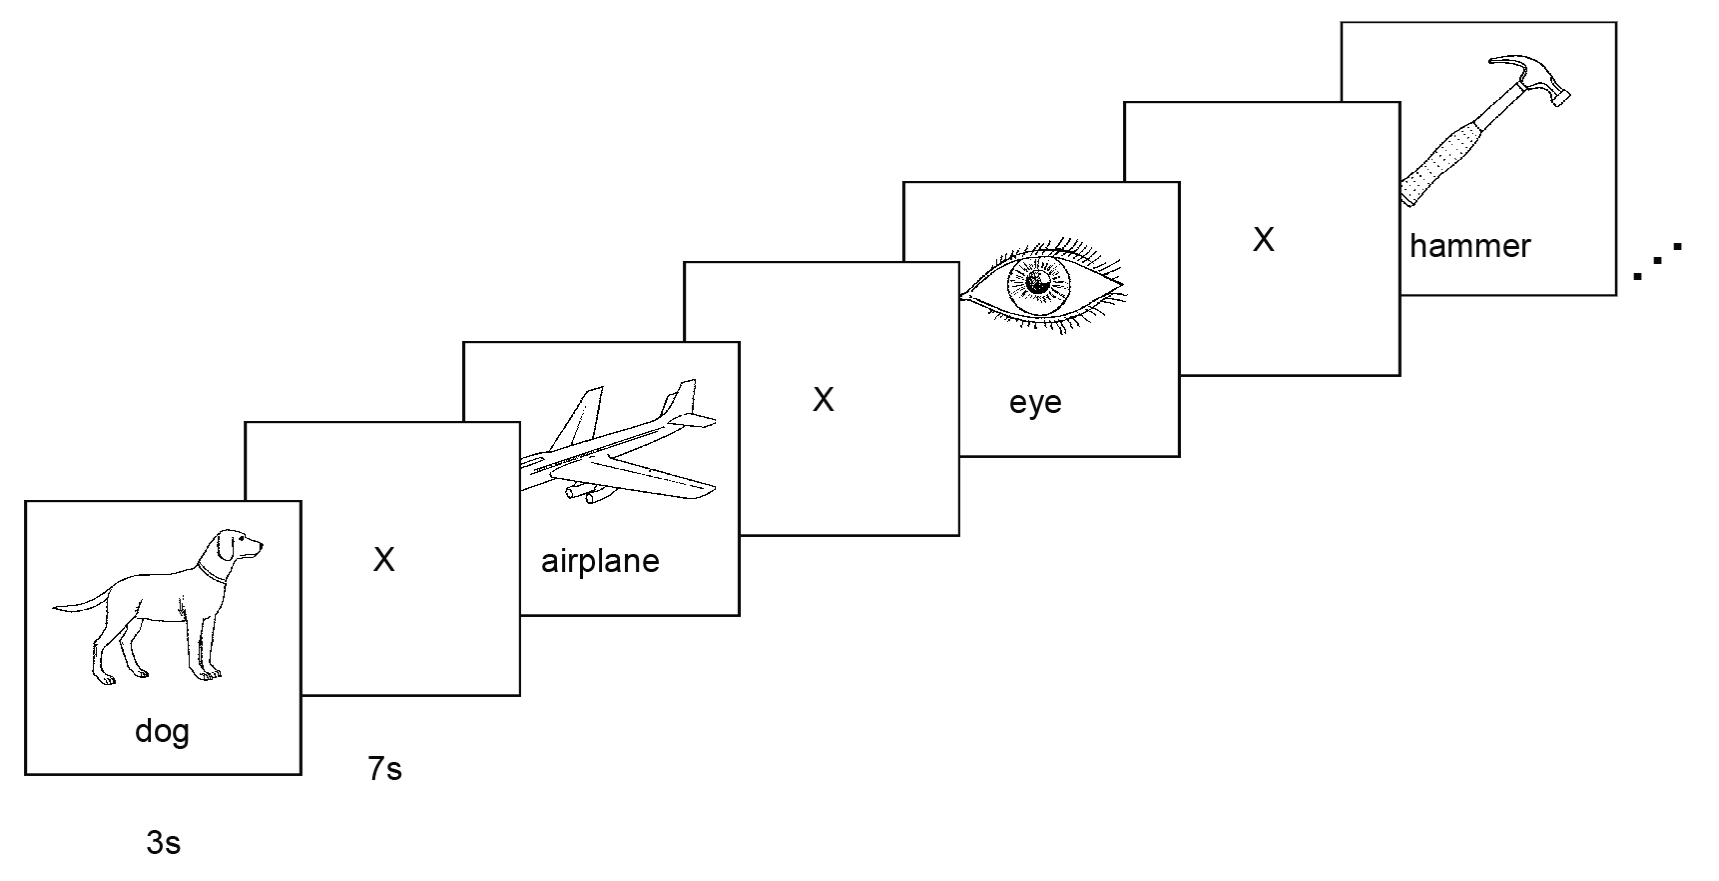

60 distinct exemplars, presented 6 times each

[Mitchell et al. Science 2008](https://science.sciencemag.org/content/320/5880/1191.abstract), data available [online](https://www.cs.cmu.edu/afs/cs/project/theo-73/www/science2008/data.html).

## Continuous $X_i$

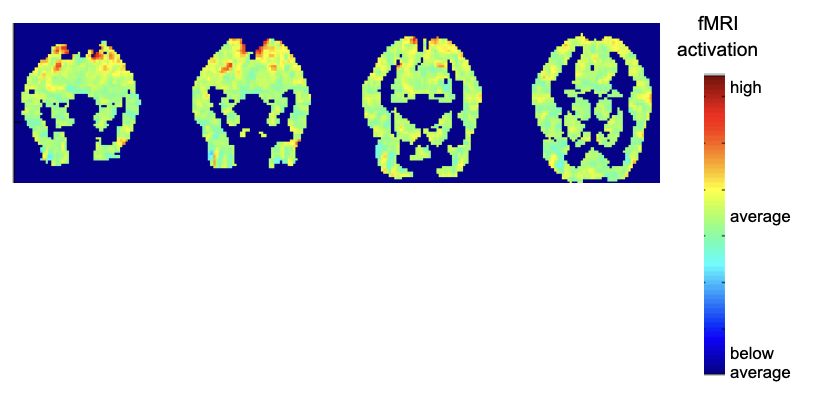

$Y$ is the mental state (reading “house” or “bottle”)

$X_i$ are the voxel activities  (voxel = volume pixel).

## Continuous $X_i$


Naïve Bayes requires $P(X_i | Y=y_k)$ but $X_i$ is continuous:


$$ P(Y=y_k|X_1,...,X_d) = \frac{P(Y=y_k) \prod_i P(X_i|Y=y_k) }{\sum_\ell (Y=y_\ell) \prod_i P(X_i|Y=y_\ell)} $$


What can we do?


## Continuous $X_i$


Naïve Bayes requires $P(X_i | Y=y_k)$ but $X_i$ is continuous:


$$ P(Y=y_k|X_1,...,X_d) = \frac{P(Y=y_k) \prod_i P(X_i|Y=y_k) }{\sum_\ell (Y=y_\ell) \prod_i P(X_i|Y=y_\ell)} $$


What can we do?

Common approach: assume $P(X_i | Y=y_k)$ follows a Normal (Gaussian) distribution


$$p(X_i = x|Y=y_k) = \frac{1}{\sqrt{2\pi\sigma^2_{ik}}} \text{exp}\big({-\frac{1}{2}\frac{(x_i-\mu_{ik})^2}{\sigma_{ik}^2}}\big)$$

Sometimes assume standard deviation
- is independent of Y (i.e., $\sigma_i$), 
- or independent of Xi (i.e., $\sigma_k$)
- or both (i.e., $\sigma$)

## Gaussian Naïve Bayes Algorithm – continuous $X_i$ (but still discrete Y)


- Training:
    - Estimate $\pi_k \equiv P(Y=y_k)$ 
    - Each label $y_k$:  
        - For each variable $X_i$ estimate $P(X_i=x_{ij}|Y=y_k) $:
            - estimate class conditional mean $\mu_{ik}$ and standard deviation $\sigma_{ik}$


- Prediction: Classify $Y^{\text{new}}$
\begin{eqnarray}Y^{\text{new}} &=& \underset{y_k}{\operatorname{argmax}} P(Y=y_k) \prod_i P(X^{\text{new}}_i=x^{\text{new}}_j|Y=y_k) \\
&=& \underset{y_k}{\operatorname{argmax}} \pi_k\prod_i  \mathcal{N} (X_i^{\text{new}}; \mu_{ik}, \sigma_{ik})
\end{eqnarray}

<!-- get  $\hat\pi_k$ -->


## Estimating Parameters: $Y$ discrete, $X_i$ continuous 


\begin{eqnarray}
\hat\mu_{ik} = \frac{1}{\sum_j \delta(Y^j = y_k) } \sum_j X_i^j \delta(Y^j = y_k)
\end{eqnarray}

- i: index of feature
- j: index of data point
- k: index of class
- $\delta$ function is 1 if argument is true and 0 otherwise

\begin{eqnarray}
\hat\sigma^2_{ik} = \frac{1}{\sum_j \delta(Y^j = y_k) } \sum_j (X_i^j - \hat\mu_{ik})^2\delta(Y^j = y_k)
\end{eqnarray}


## Classification task: is person viewing a “tool” or “building”?
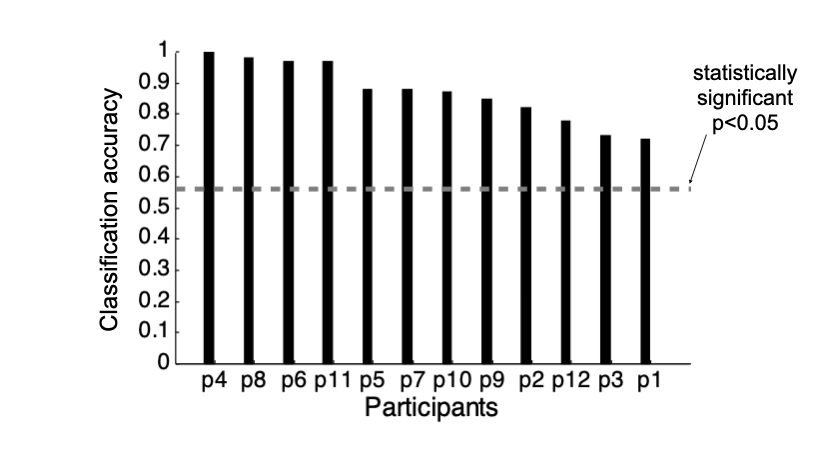

## Where is information encoded in the brain?

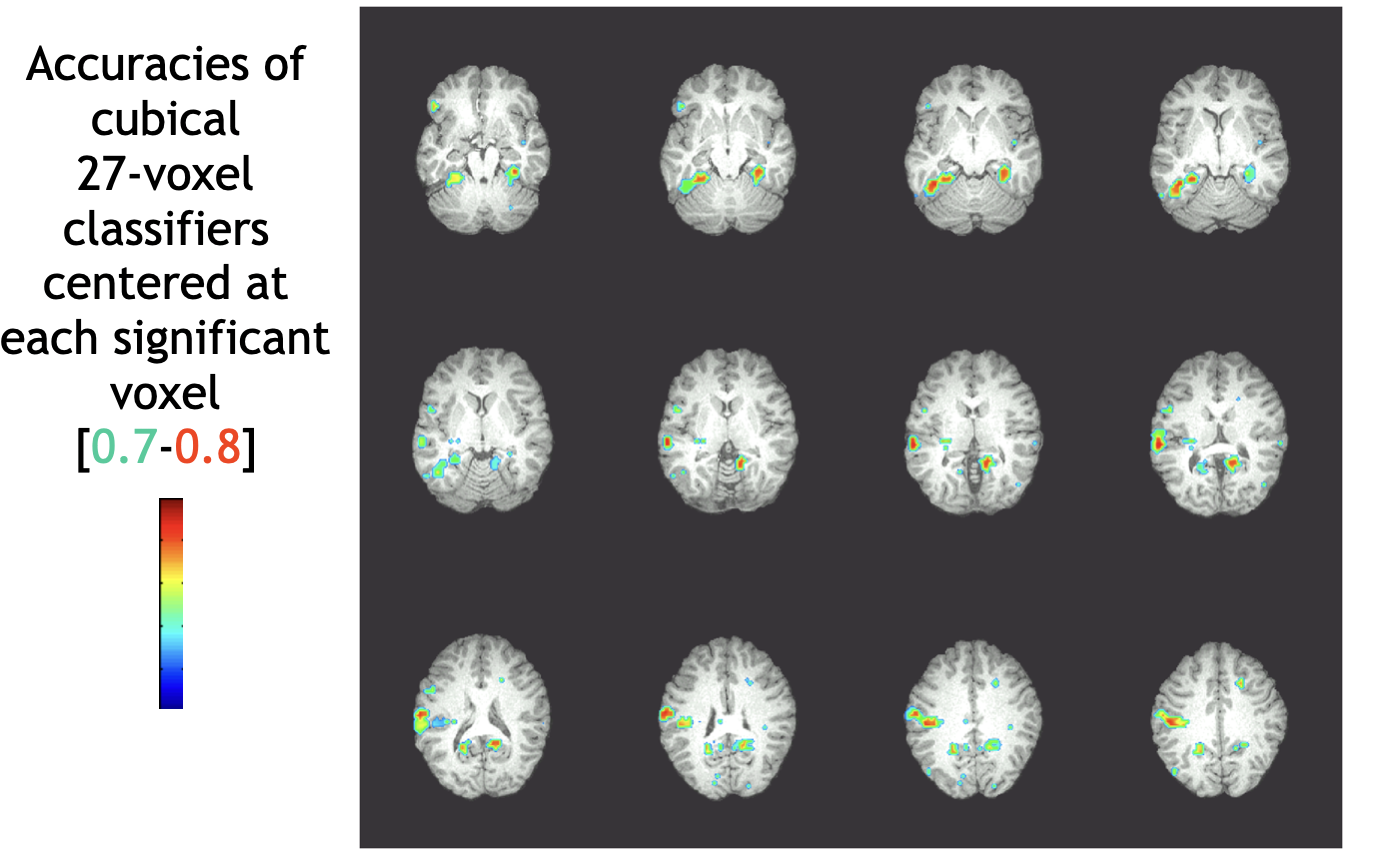

## Let's simulate the behavior of GNB!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
 
x1 = np.linspace(-10,10,1000)
x2 = np.linspace(-10,10,1000)

# Assume I know the true parameters, this is not the case usually!
mu_1_1 = -5; sigma_1_1 = 2
mu_2_1 = 5; sigma_2_1 = 2
mu_1_0 = 5; sigma_1_0 = 2
mu_2_0 = -5; sigma_2_0 = 2

# Sample data from these distributions
X_positive = norm.rvs(loc=[mu_1_1,mu_2_1], scale=[sigma_1_1, sigma_2_1], size = (100,2))
X_negative = norm.rvs(loc=[mu_1_0,mu_2_0], scale=[sigma_1_0, sigma_2_0], size = (100,2))

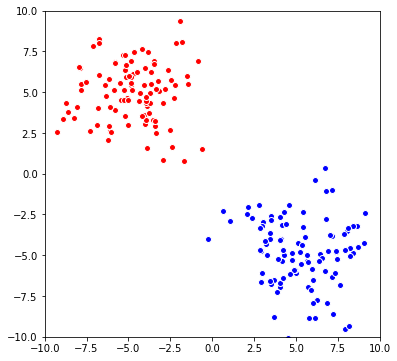

In [16]:
plt.figure(figsize=(6,6))
plt.scatter(X_positive[:, 0], X_positive[:, 1],facecolors='r', edgecolors='w')
plt.scatter(X_negative[:, 0], X_negative[:, 1],facecolors='b', edgecolors='w')
plt.axis([-10,10,-10,10],'equal');

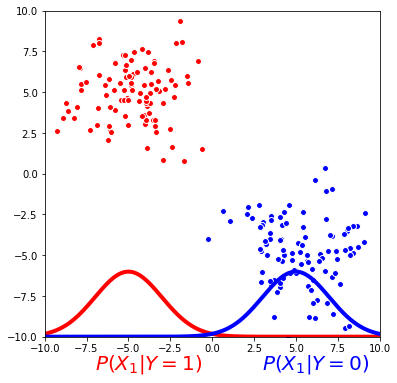

In [17]:
P_X1_1 = norm.pdf(x1,mu_1_1,sigma_1_1)
P_X2_1 = norm.pdf(x1,mu_2_1,sigma_2_1)
P_X1_0 = norm.pdf(x1,mu_1_0,sigma_1_0)
P_X2_0 = norm.pdf(x1,mu_2_0,sigma_2_0)

plt.figure(figsize=(6,6))
plt.scatter(X_positive[:, 0], X_positive[:, 1],facecolors='r', edgecolors='w')
plt.scatter(X_negative[:, 0], X_negative[:, 1],facecolors='b', edgecolors='w')
lim_plot = 10
plt.plot(x1,P_X1_1*2*lim_plot-lim_plot,'r',linewidth=4)
plt.text(-7, -12, r'$P(X_1|Y=1)$', color = 'red',fontsize=20)
plt.plot(x1,P_X1_0*2*lim_plot-lim_plot,'b',linewidth=4)
plt.text(3, -12, r'$P(X_1|Y=0)$', color = 'blue',fontsize=20)
plt.axis([-10,10,-10,10],'equal');

[-10, 10, -10, 10]

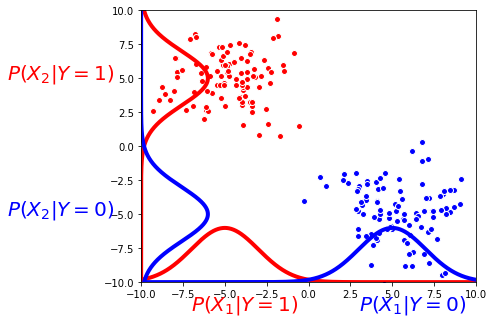

In [18]:
plt.figure(figsize=(6,5))
plt.scatter(X_positive[:, 0], X_positive[:, 1],facecolors='r', edgecolors='w')
plt.scatter(X_negative[:, 0], X_negative[:, 1],facecolors='b', edgecolors='w')

lim_plot = 10
plt.plot(x1,P_X1_1*2*lim_plot-lim_plot,'r',linewidth=4)
plt.text(-7, -12, r'$P(X_1|Y=1)$', color = 'red',fontsize=20)
plt.plot(x1,P_X1_0*2*lim_plot-lim_plot,'b',linewidth=4)
plt.text(3, -12, r'$P(X_1|Y=0)$', color = 'blue',fontsize=20)
plt.plot(P_X2_1*2*lim_plot-lim_plot,x1,'r',linewidth=4)
plt.text(-18,5,  r'$P(X_2|Y=1)$', color = 'red',fontsize=20)
plt.plot(P_X2_0*2*lim_plot-lim_plot,x1,'b',linewidth=4)
plt.text(-18,-5,  r'$P(X_2|Y=0)$', color = 'blue',fontsize=20)
plt.axis([-lim_plot,lim_plot,-lim_plot,lim_plot],'equal')

In [19]:

# Compute log( P(Y=1|X)/ P(Y =0|X))
# as log( P(Y=1)P(X1|Y=1)P(X2|Y=1)  / P(Y =0|X))P(X1|Y=0)P(X2|Y=0) )
# Using the real parameters. Usually, we have to estimate these!
X1,X2 = np.meshgrid(x1, x2)
def ratio_log(X1,X2):
    pY0 =0.5; pY1 = 1- pY0
    pY1pXY1 = pY1*norm.pdf(X1,mu_1_1,sigma_1_1)*norm.pdf(X2,mu_2_1,sigma_2_1)
    pY0pXY0 = pY0*norm.pdf(X1,mu_1_0,sigma_1_0)*norm.pdf(X2,mu_2_0,sigma_2_0)
    return np.log(pY1pXY1/pY0pXY0)
fX = ratio_log(X1,X2)

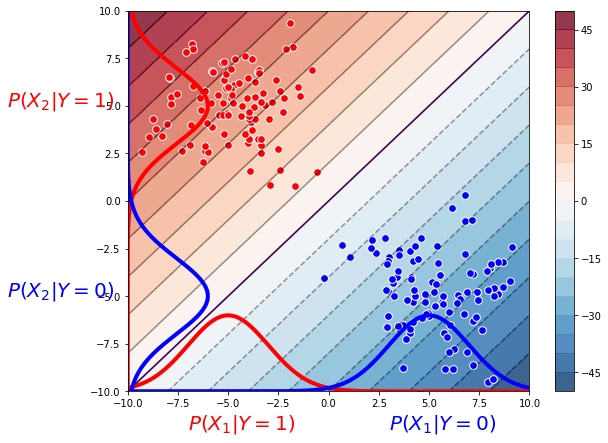

In [20]:
plt.figure(figsize=(9,7))

# plot contour plot
cs = plt.contourf(X1, X2, fX,20,cmap='RdBu_r',alpha=0.8);
plt.colorbar()
contours = plt.contour(cs, colors='k',alpha=0.4) # this redraws the lines in black
plt.contour(contours,levels=[0],linewidth=5)   # this makes the 0 line wider


# previous stuff
plt.scatter(X_positive[:, 0], X_positive[:, 1],facecolors='r', edgecolors='w',s=60)
plt.scatter(X_negative[:, 0], X_negative[:, 1],facecolors='b', edgecolors='w',s=60)


lim_plot = 10

plt.plot(x1,P_X1_1*2*lim_plot-lim_plot,'r',linewidth=4)
plt.text(-7, -12, r'$P(X_1|Y=1)$', color = 'red',fontsize=20)

plt.plot(x1,P_X1_0*2*lim_plot-lim_plot,'b',linewidth=4)
plt.text(3, -12, r'$P(X_1|Y=0)$', color = 'blue',fontsize=20)

plt.plot(P_X2_1*2*lim_plot-lim_plot,x1,'r',linewidth=4)
plt.text(-16,5,  r'$P(X_2|Y=1)$', color = 'red',fontsize=20)

plt.plot(P_X2_0*2*lim_plot-lim_plot,x1,'b',linewidth=4)
plt.text(-16,-5,  r'$P(X_2|Y=0)$', color = 'blue',fontsize=20)



plt.axis([-lim_plot,lim_plot,-lim_plot,lim_plot],'equal');

In [21]:
def ratio_log_updated (X1,X2,params): # just as an example, not used here
    pY0 =0.5; pY1 = 1- pY0
    pY1pXY1 = pY1*norm.pdf(X1,params['mu_1_1'],params['sigma_1_1'])*norm.pdf(X2,params['mu_2_1'],params['sigma_2_1'])
    pY0pXY0 = pY0*norm.pdf(X1,params['mu_1_0'],params['sigma_1_0'])*norm.pdf(X2,params['mu_2_0'],params['sigma_2_0'])
    return np.log(pY1pXY1/pY0pXY0)

In [23]:
def plot_GNB(X_positive,X_negative,params):
    pY0 =0.5; pY1 = 1- pY0
    P_X1_1 = norm.pdf(x1,params['mu_1_1'],params['sigma_1_1'])
    P_X2_1 = norm.pdf(x1,params['mu_2_1'],params['sigma_2_1'])
    P_X1_0 = norm.pdf(x1,params['mu_1_0'],params['sigma_1_0'])
    P_X2_0 = norm.pdf(x1,params['mu_2_0'],params['sigma_2_0'])
    X1,X2 = np.meshgrid(x1, x2)
    # faster way to compute the log ratio, or can use fX = ratio_log_updated(X1,X2,params)
    fX = np.log(pY1/pY0) + np.log(P_X1_1.reshape([1000,1]).dot(P_X2_1.reshape([1,1000]))/
                             P_X1_0.reshape([1000,1]).dot(P_X2_0.reshape([1,1000])))
    plt.figure(figsize=(10,8))
    # plot contour plot
    cs = plt.contourf(X1, X2, fX,20,cmap='RdBu_r',alpha=0.8);
    plt.colorbar()
    contours = plt.contour(cs, colors='k',alpha=0.4)
    plt.contour(contours,levels=[0],linewidth=5)
    plt.scatter(X_positive[:, 0],X_positive[:, 1],facecolors='r',edgecolors='w',s=60)
    plt.scatter(X_negative[:, 0],X_negative[:, 1],facecolors='b',edgecolors='w',s=60)
    lim_plot = 10
    plt.plot(x1,P_X1_1*2*lim_plot-lim_plot,'r',linewidth=4)
    plt.text(-7, -12, r'$P(X_1|Y=1)$', color = 'red',fontsize=20)
    plt.plot(x1,P_X1_0*2*lim_plot-lim_plot,'b',linewidth=4)
    plt.text(3, -12, r'$P(X_1|Y=0)$', color = 'blue',fontsize=20)
    plt.plot(P_X2_1*2*lim_plot-lim_plot,x1,'r',linewidth=4)
    plt.text(-16,5,  r'$P(X_2|Y=1)$', color = 'red',fontsize=20)
    plt.plot(P_X2_0*2*lim_plot-lim_plot,x1,'b',linewidth=4)
    plt.text(-16,-5,  r'$P(X_2|Y=0)$', color = 'blue',fontsize=20)
    plt.axis([-lim_plot,lim_plot,-lim_plot,lim_plot],'equal')

## The features $X_1$ and $X_2$ in the simulation where conditionally independent

What if:
- we make them dependent (use a non-diagonal covariance matrix to sample multivariate gaussian)
- We still use conditional independence as an assumption for GNB

1st: case where same variance

In [ ]:
from scipy.stats import multivariate_normal

# Same param as before
mu_1_1 = -5; sigma_1_1 = 2; mu_2_1 = 5; sigma_2_1 = 2
mu_1_0 = 5; sigma_1_0 = 2; mu_2_0 = -5; sigma_2_0 = 2

cov_positive = np.array([[sigma_1_1**2,3], [3,sigma_2_1**2]] )
cov_negative = np.array([[sigma_1_0**2,3], [3,sigma_2_0**2]] )

print(cov_positive)

# Sample data from these distributions
X_positive = multivariate_normal.rvs(mean=[mu_1_1,mu_2_1],cov=cov_positive,size=(100))
X_negative = multivariate_normal.rvs(mean=[mu_1_0,mu_2_0],cov=cov_negative,size=(100))

[[4 3]
 [3 4]]


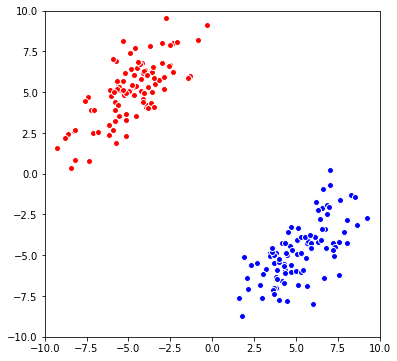

In [20]:
plt.figure(figsize=(6,6))
plt.scatter(X_positive[:, 0], X_positive[:, 1],facecolors='r', edgecolors='w')
plt.scatter(X_negative[:, 0], X_negative[:, 1],facecolors='b', edgecolors='w')
plt.axis([-10,10,-10,10],'equal');

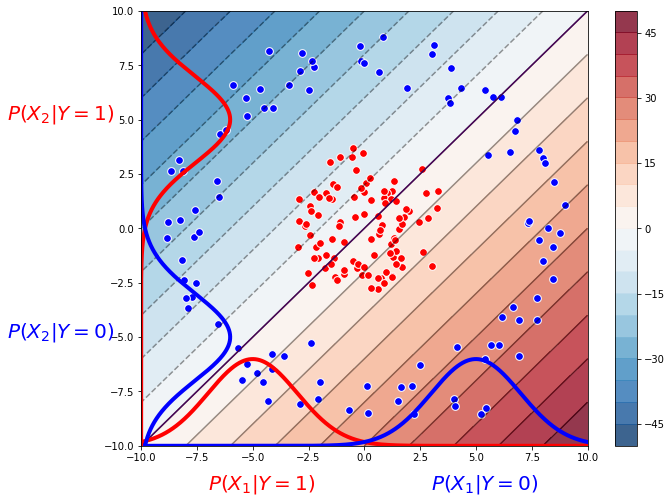

In [39]:
# Assume I perfectly estimate the parameters (not true for limited data!)
params = dict(mu_1_1 = -5, sigma_1_1 = 2,mu_2_1 = 5, sigma_2_1 = 2,
            mu_1_0 = 5, sigma_1_0 = 2,mu_2_0 = -5, sigma_2_0 = 2)

plot_GNB(X_positive,X_negative,params)

In [22]:
# Estimate

mu_1_1, mu_2_1 = np.mean(X_positive,axis=0)
mu_1_0, mu_2_0 = np.mean(X_negative,axis=0)

# Same Variance!

sigma_1_1, sigma_2_1 = np.std(X_positive,axis=0) 
sigma_1_0, sigma_2_0 = np.std(X_negative,axis=0)
print(sigma_1_1, sigma_2_1)
print(sigma_1_0, sigma_2_0)


1.7556505128707445 1.830266323858797
1.8626233472002263 1.9122394301165095


## Is GNB a linear separator?

- It depends on whether we allow it to learn different standard deviations for each class

Decision rule:

\begin{eqnarray} 
\ln \frac{P(Y=1|X_1...X_d)}{P(Y=0|X_1...X_d)} = \ln \frac{P(Y=1)}{P(Y=0)} + \sum_i\ln \frac{P(X_i|Y=1)}{P(X_i|Y=0)}  ~ ~ ~ ~ ~ > \text{ or } <0?
\end{eqnarray}  

If $X_i$s are $\mathcal{N}(\mu_{ik},\sigma_{ik})$:

$$p(X_i = x|Y=y_k) = \frac{1}{\sqrt{2\pi\sigma^2_{ik}}} \text{exp}\big({-\frac{1}{2}\frac{(x_{i}-\mu_{ik})^2}{\sigma_{ik}^2}}\big)$$


$~$

\begin{eqnarray} 
\ln \frac{P(Y=1|X_1...X_d)}{P(Y=0|X_1...X_d)} &=& \ln \frac{P(Y=1)}{P(Y=0)} + \sum_i\ln \frac{P(X_i|Y=1)}{P(X_i|Y=0)} \\
&=& \ln \frac{P(Y=1)}{P(Y=0)} + \sum_i \ln  \frac{\sigma_{i0}}{\sigma_{i1}} +  G(X)\\
\end{eqnarray}
\begin{eqnarray} 
G(X) &=& \sum_i \ln\text{exp} \big( -\frac{1}{2} \frac{(x_{i}-\mu_{i1})^2}{\sigma_{i1}^2} + \frac{1}{2} \frac{(x_{i}-\mu_{i0})^2}{\sigma_{i0}^2}  \big )\\
% &=& \ln \frac{P(Y=1)}{P(Y=0)} + \sum_i \ln  \frac{\sigma_{i0}}{\sigma_{i1}} -\frac{1}{2} \sum_i   \big(  \frac{(x_{i}-\mu_{i1})^2}{\sigma_{i1}^2} \\- \frac{(x_{i}-\mu_{i0})^2}{\sigma_{i0}^2}  \big ) \\
&=&  -\frac{1}{2}  \sum_i   \big(  x_{i} ^2(\frac{1}{\sigma_{i1}^2} - \frac{1}{\sigma_{i0}^2} ) - 
2 x_{i} (\frac{\mu_{i1}}{\sigma_{i1}^2} - \frac{\mu_{i0}}{\sigma_{i0}^2} )
+ (\frac{\mu_{i1}^2}{\sigma_{i1}^2} - \frac{\mu_{i0}^2}{\sigma_{i0}^2} )
\big ) 
\end{eqnarray}  


What happens if we force $\sigma_{i0} =\sigma_{i1} $? 


- We get a linear decision boundary. Otherwise, it's a quadratic decision boundary.

In [ ]:
# Same param as before
mu_1_1 = -5; sigma_1_1 = 2
mu_2_1 = 5; sigma_2_1 = 2
mu_1_0 = 5; sigma_1_0 = 2
mu_2_0 = -5; sigma_2_0 = 2

cov_positive = np.array([[sigma_1_1**2,3], [3,sigma_2_1**2]] )
cov_negative = np.array([[sigma_1_0**2,3], [3,sigma_2_0**2]] )

# Sample data from these distributions
X_positive = multivariate_normal.rvs(mean=[mu_1_1,mu_2_1], cov=cov_positive, size = (100))
X_negative = multivariate_normal.rvs(mean=[mu_1_0,mu_2_0], cov=cov_negative, size = (100))

In [28]:
params = dict()
# Estimate - Different variance because of limited sample size
params['mu_1_1'], params['mu_2_1'] = np.mean(X_positive,axis=0)
params['sigma_1_1'], params['sigma_2_1'] = np.std(X_positive,axis=0)
params['mu_1_0'], params['mu_2_0'] = np.mean(X_negative,axis=0)
params['sigma_1_0'], params['sigma_2_0'] = np.std(X_negative,axis=0)

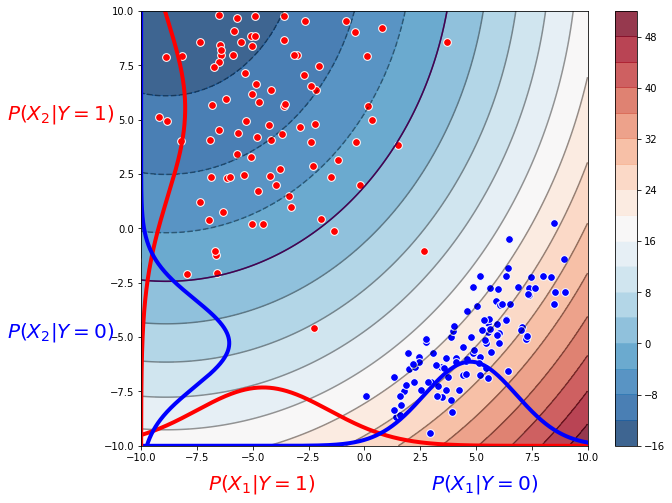

In [29]:
plot_GNB(X_positive,X_negative,params)

[-10, 10, -10, 10]

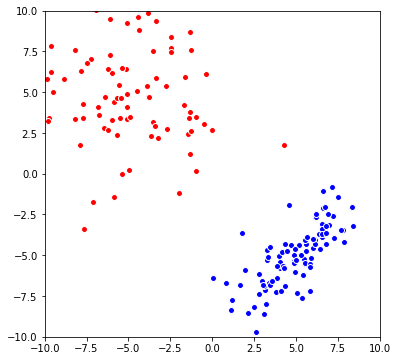

In [40]:
# Let's set up another example in which the variances are actually different
mu_1_1 = -5; sigma_1_1 = 3
mu_2_1 = 5; sigma_2_1 = 4
mu_1_0 = 5; sigma_1_0 = 2
mu_2_0 = -5; sigma_2_0 = 2

cov_positive = np.array([[sigma_1_1**2,3], [3,sigma_2_1**2]] )
cov_negative = np.array([[sigma_1_0**2,3], [3,sigma_2_0**2]] )

# Sample data from these distributions
X_positive = multivariate_normal.rvs(mean=[mu_1_1,mu_2_1],cov=cov_positive,size=(100))
X_negative = multivariate_normal.rvs(mean=[mu_1_0,mu_2_0],cov=cov_negative,size=(100))

plt.figure(figsize=(6,6))

plt.scatter(X_positive[:, 0], X_positive[:, 1],facecolors='r', edgecolors='w')
plt.scatter(X_negative[:, 0], X_negative[:, 1],facecolors='b', edgecolors='w')
plt.axis([-10,10,-10,10],'equal')

In [41]:
params = dict()
# Estimate - Different variance
params['mu_1_1'], params['mu_2_1'] = np.mean(X_positive,axis=0)
params['sigma_1_1'], params['sigma_2_1'] = np.std(X_positive,axis=0)
params['mu_1_0'], params['mu_2_0'] = np.mean(X_negative,axis=0)
params['sigma_1_0'], params['sigma_2_0'] = np.std(X_negative,axis=0)

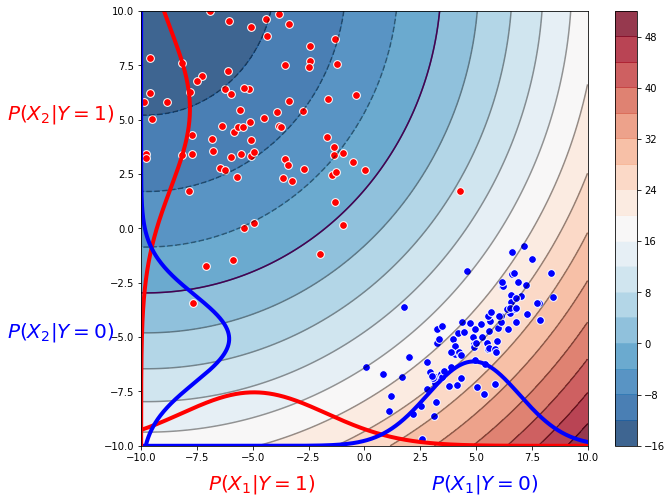

In [42]:
plot_GNB(X_positive,X_negative,params)

In [43]:
from sklearn import datasets

plt.figure(figsize=(5,5))
X, y = datasets.make_circles(n_samples=200, factor=.25,noise=.1)

# scale
X_positive = X[y==1]*8
X_negative = X[y==0]*8

<Figure size 360x360 with 0 Axes>

[-10, 10, -10, 10]

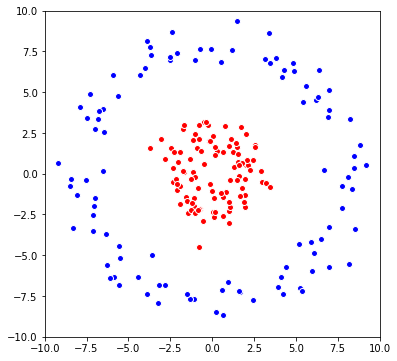

In [44]:
plt.figure(figsize=(6,6))

plt.scatter(X_positive[:, 0], X_positive[:, 1],facecolors='r', edgecolors='w')
plt.scatter(X_negative[:, 0], X_negative[:, 1],facecolors='b', edgecolors='w')
plt.axis([-10,10,-10,10],'equal')

In [45]:
params = dict()
# Artificially force same variances
params['mu_1_1'], params['mu_2_1'] = np.mean(X_positive,axis=0)
params['sigma_1_1'], params['sigma_2_1'] = np.std(np.vstack([X_positive,X_negative]),axis=0)
params['mu_1_0'], params['mu_2_0'] = np.mean(X_negative,axis=0)
params['sigma_1_0'], params['sigma_2_0'] = np.std(np.vstack([X_positive,X_negative]),axis=0) 

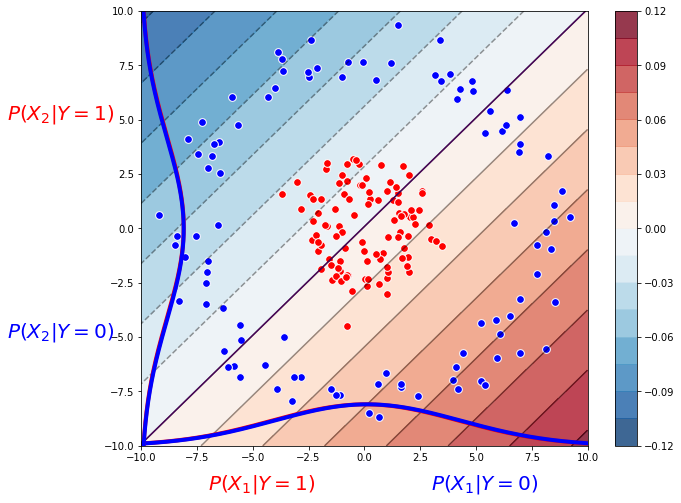

In [46]:
plot_GNB(X_positive,X_negative,params)

In [47]:
params = dict()
# Estimate - Different variance
params['mu_1_1'], params['mu_2_1'] = np.mean(X_positive,axis=0)
params['sigma_1_1'], params['sigma_2_1'] = np.std(X_positive,axis=0)
params['mu_1_0'], params['mu_2_0'] = np.mean(X_negative,axis=0)
params['sigma_1_0'], params['sigma_2_0'] = np.std(X_negative,axis=0)

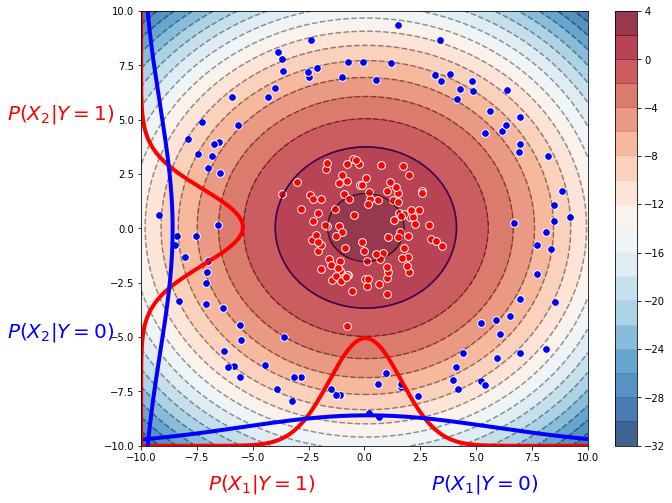

In [48]:
plot_GNB(X_positive,X_negative,params)

## The last example is a case where the conditional independence assumption is incorrect

- but GNB does very well

## What you should know 

Naïve Bayes classifier
- What’s the assumption
- Why we use it
- How do we learn it
- The different observations we made about it
- Why is Bayesian estimation important